In [1]:
pip install scikit-learn

In [2]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person = 60) #download & display images     #ระบุจำนวนภาพที่น้อยที่สุดในแต่ละบุคคล

print(faces.target_names)
print(faces.images.shape) 

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


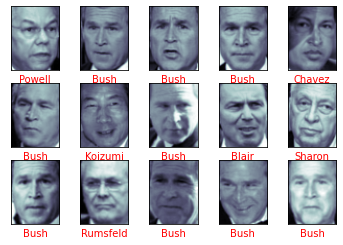

In [3]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(3,5) #fig = กำหนดการแสดงผลในรูป figure   ax = รูปแบบตำแหน่งของรูปภาพ
for i,axi in enumerate(ax.flat):  # i = ตำแหน่ง axi = รูปที่จะแสดง
    axi.imshow(faces.images[i],cmap = "bone")
    axi.set(xticks = [],yticks = []) #ระบุพิกัด
    axi.set_xlabel(faces.target_names[faces.target[i]].split()[-1],color = 'red') # split()[-1] หันชื่อออก เหลือนามสกุล

plt.show()

In [4]:
from sklearn.decomposition import  PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split,GridSearchCV

#reduce & create model
pca = PCA(n_components = 150 ,svd_solver = 'randomized',whiten = True)  #รูปแบบของ component =  svd_solver

svc = SVC(kernel = 'rbf',class_weight = 'balanced') #kernel ในการกำหนดเส้นแบ่งข้อมูล มี 3 ตัว คือ Gaussian RBF , Sigmoid , Polynomial

model = make_pipeline(pca,svc) #รวม pca และ svc ให้ทพงานร่วมกัน

#train test
x_train,x_test,y_train,y_test = train_test_split(faces.data,faces.target,random_state = 40)

#การปรับค่าไฮเพอร์พารามิเตอร์ ให้มีประสิทธิภาพ ใน Coding จะใช้ GridsearchCV
# ค่า Regularisation (C ) คือ การปรับขนาดของค่านี้ เพื่อป้องกันการเรียนรู้เกินขอบเขต ด้วยการแบ่งข้อมูลมาใช้ตรวจสอบ 
#ค่า Gamma คือ อัตราการค่า ตาม ระยะห่างระหว่างกลุ่มของข้อมูล ใช้ร่วมกับ GS RBF กับ ค่า Reg...

param = {'svc__C':[1,5,10,50],'svc__gamma':[0.0001,0.0005,0.001,0.005]} #กำหนดค่า c และ ค่า gamma มา เพื่อจะปรับประสิทธิภาพ ค่าไฮเพอร์พารามิเตอร์
#การกำหนด param ภายใน object ค่าต้องเป็นแบบนี้ svc__C (C ตัวใหญ่) svc__gamma และมี underscore 2 ตัว ( __ )
grid = GridSearchCV(model,param)
grid.fit(x_train,y_train) #นำข้อมูลสำหรับ train ไป train ใน model
print(grid.best_params_) #ค่าที่เหมาะสมที่สุดของ kernel 'GS RBF'

{'svc__C': 1, 'svc__gamma': 0.005}


In [5]:
print(grid.best_estimator_) #ข้อมูลที่เกิดเป็นก้อน model ที่ดีที่สุด

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=150,
                     random_state=None, svd_solver='randomized', tol=0.0,
                     whiten=True)),
                ('svc',
                 SVC(C=1, break_ties=False, cache_size=200,
                     class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.005,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)


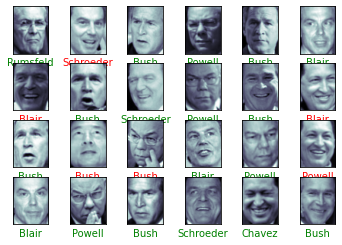

In [13]:
model = grid.best_estimator_
y_predict = model.predict(x_test)

#แสดงผล การ predict

def color (y_predict,y_test):
    if  y_predict == y_test:
        return 'green'
    else:
        return 'red'

fig,ax = plt.subplots(4,6) #fig = กำหนดการแสดงผลในรูป figure   ax = รูปแบบตำแหน่งของรูปภาพ
for i,axi in enumerate(ax.flat):  # i = ตำแหน่ง axi = รูปที่จะแสดง
    axi.imshow(x_test[i].reshape(62,47),cmap = "bone") # แสดงภาพ ของ test data  
    axi.set(xticks = [],yticks = []) #ตารางระบุพิกัดแกน x,y ให้ไม่มีค่าใดๆ
    axi.set_xlabel(faces.target_names[y_predict[i]].split()[-1], color = color(y_predict[i],y_test[i])) # โยน y_predict แทน faces.target

plt.show()

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix

print('Accuracy = ',accuracy_score(y_test,y_predict))

Accuracy =  0.8308605341246291


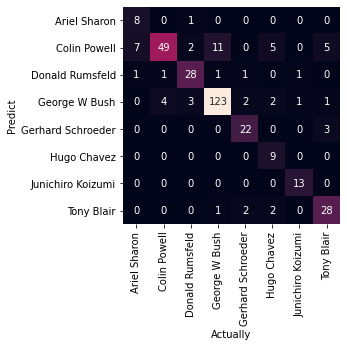

In [17]:
import seaborn as sb

#แสดงค่าความคลาดเคลื่อน

mat = confusion_matrix(y_test,y_predict)

sb.heatmap(mat.T,square = True,annot=True,fmt='d',cbar = False,xticklabels = faces.target_names,yticklabels = faces.target_names)
#xticklabels = ข้อมูลจาก y_test  y_ticklabels = ข้อมูลจาก y_predict

plt.xlabel('Actually')
plt.ylabel('Predict')
plt.show()